In [48]:
import pandas as pd

In [49]:
df = pd.read_csv('candles.csv')
print(df.columns)
print(df.describe())
print(df.head(5))
print(df['symbol'].unique())

Index(['symbol', 'unix', 't', 'o', 'h', 'l', 'c', 'v', 'vw'], dtype='object')
               unix              o              h              l  \
count  1.352810e+05  135281.000000  135281.000000  135281.000000   
mean   1.675642e+12     164.934529     165.017104     164.851042   
std    1.715895e+09      73.536816      73.555336      73.517172   
min    1.672736e+12      60.090000      60.240000      60.050000   
25%    1.674162e+12      82.890000      82.920000      82.860000   
50%    1.675702e+12     183.670200     183.880000     183.430000   
75%    1.677157e+12     239.480000     239.520000     239.400000   
max    1.678496e+12     276.455000     276.760000     275.720000   

                   c             v             vw  
count  135281.000000  1.352810e+05  135281.000000  
mean      164.934398  9.391005e+04     164.936160  
std        73.536151  1.935464e+05      73.536184  
min        60.090000  1.000000e+02      56.949100  
25%        82.890000  1.023000e+03      82.893400

In [50]:
df = df.rename(columns={"t": "time stamp", "o": "open", "h": "high", "l": "low", \
                   "c": "close", "v": "volume"})[['symbol', 'time stamp', 'open', \
                            'high', 'low', 'close', 'volume']]

In [51]:
df.head()

,symbol,time stamp,open,high,low,close,volume
0,MSFT,2023-01-03 04:00,240.99,242.01,240.99,242.01,390
1,MSFT,2023-01-03 04:01,240.99,242.01,240.99,242.01,390
2,MSFT,2023-01-03 04:02,240.99,242.01,240.99,242.01,390
3,MSFT,2023-01-03 04:03,242.78,242.78,242.78,242.78,276
4,MSFT,2023-01-03 04:04,242.80,242.80,242.80,242.80,869


In [52]:
# ['MSFT' 'TSLA' 'AMD']
df_msft = df.loc[df['symbol'] == 'MSFT']
df_tsla = df.loc[df['symbol'] == 'TSLA']
df_tsla = df_tsla.reset_index()
df_tsla['index'] = df_tsla['index'] - df_tsla['index'][0]
df_amd = df.loc[df['symbol'] == 'AMD']
df_amd = df_amd.reset_index()
df_amd['index'] = df_amd['index'] - df_amd['index'][0]

In [53]:
df_msft[df_msft.columns[1:]].to_csv('msft.csv')
df_tsla[df_tsla.columns[1:]].to_csv('tsla.csv')
df_amd[df_amd.columns[1:]].to_csv('amd.csv')

In [54]:
df_amd[df_amd.columns[1:]]

,symbol,time stamp,open,high,low,close,volume
0,AMD,2023-01-03 04:00,66.01,66.01,65.95,65.95,1325
1,AMD,2023-01-03 04:01,65.50,65.50,65.50,65.50,1117
2,AMD,2023-01-03 04:02,65.63,65.70,65.63,65.70,331
3,AMD,2023-01-03 04:03,65.67,65.67,65.65,65.65,301
4,AMD,2023-01-03 04:04,65.70,65.86,65.70,65.86,1610
...,...,...,...,...,...,...,...
45078,AMD,2023-03-10 19:55,82.91,82.94,82.91,82.93,837
45079,AMD,2023-03-10 19:56,82.90,82.93,82.90,82.93,613
45080,AMD,2023-03-10 19:57,82.89,82.92,82.89,82.92,680
45081,AMD,2023-03-10 19:58,82.92,82.92,82.88,82.88,664


In [55]:
import seaborn as sns
from matplotlib import pyplot as plt

In [56]:
df_plot = df_msft[['time stamp', 'close']]
df_plot.index = pd.to_datetime(df_plot['time stamp'])

<AxesSubplot:xlabel='time stamp'>

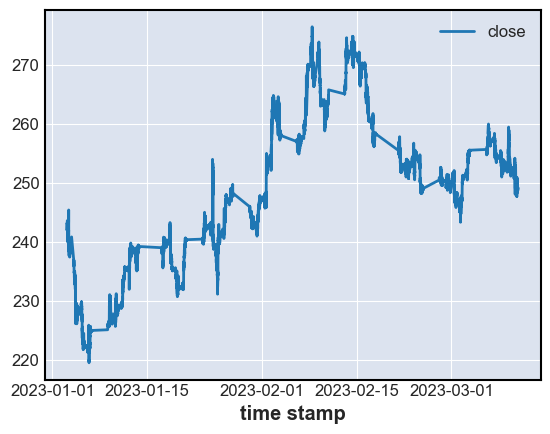

In [57]:
sns.lineplot(data=df_plot)

In [58]:
import mplfinance as mpl

In [59]:
df_amd_plt = df_amd[['open', 'high', 'low', 'close']]
df_amd_plt.index = pd.to_datetime(df_amd['time stamp'])
df_amd_plt
# mpl.plot(df_amd, type='candle')

,open,high,low,close
time stamp,,,,
2023-01-03 04:00:00,66.01,66.01,65.95,65.95
2023-01-03 04:01:00,65.50,65.50,65.50,65.50
2023-01-03 04:02:00,65.63,65.70,65.63,65.70
2023-01-03 04:03:00,65.67,65.67,65.65,65.65
2023-01-03 04:04:00,65.70,65.86,65.70,65.86
...,...,...,...,...
2023-03-10 19:55:00,82.91,82.94,82.91,82.93
2023-03-10 19:56:00,82.90,82.93,82.90,82.93
2023-03-10 19:57:00,82.89,82.92,82.89,82.92


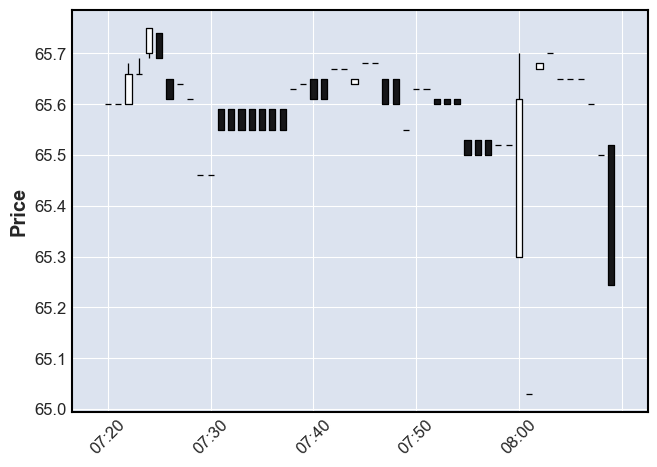

In [61]:
mpl.plot(df_amd_plt.iloc[200:250], type='candle')